In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from PIL import Image, ImageTk
import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
train_path = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_path = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [4]:

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)


In [5]:
train=train_datagen.flow_from_directory(train_path,
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=128,
                                        seed=32,
                                        subset='training',
                                        shuffle=True)



Found 56251 images belonging to 38 classes.


In [6]:
validation=train_datagen.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             class_mode='categorical',
                                             batch_size=128,
                                             seed=32,
                                             shuffle=False,
                                             subset='validation')

Found 14044 images belonging to 38 classes.


In [7]:
test=test_datagen.flow_from_directory(test_path,
                                      target_size=(224,224)
                                      ,color_mode='rgb'
                                      ,class_mode='categorical',
                                      batch_size=128)

Found 17572 images belonging to 38 classes.


In [8]:
classes_dict=train.class_indices
classes_dict

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [9]:
classes=list(classes_dict.keys())
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

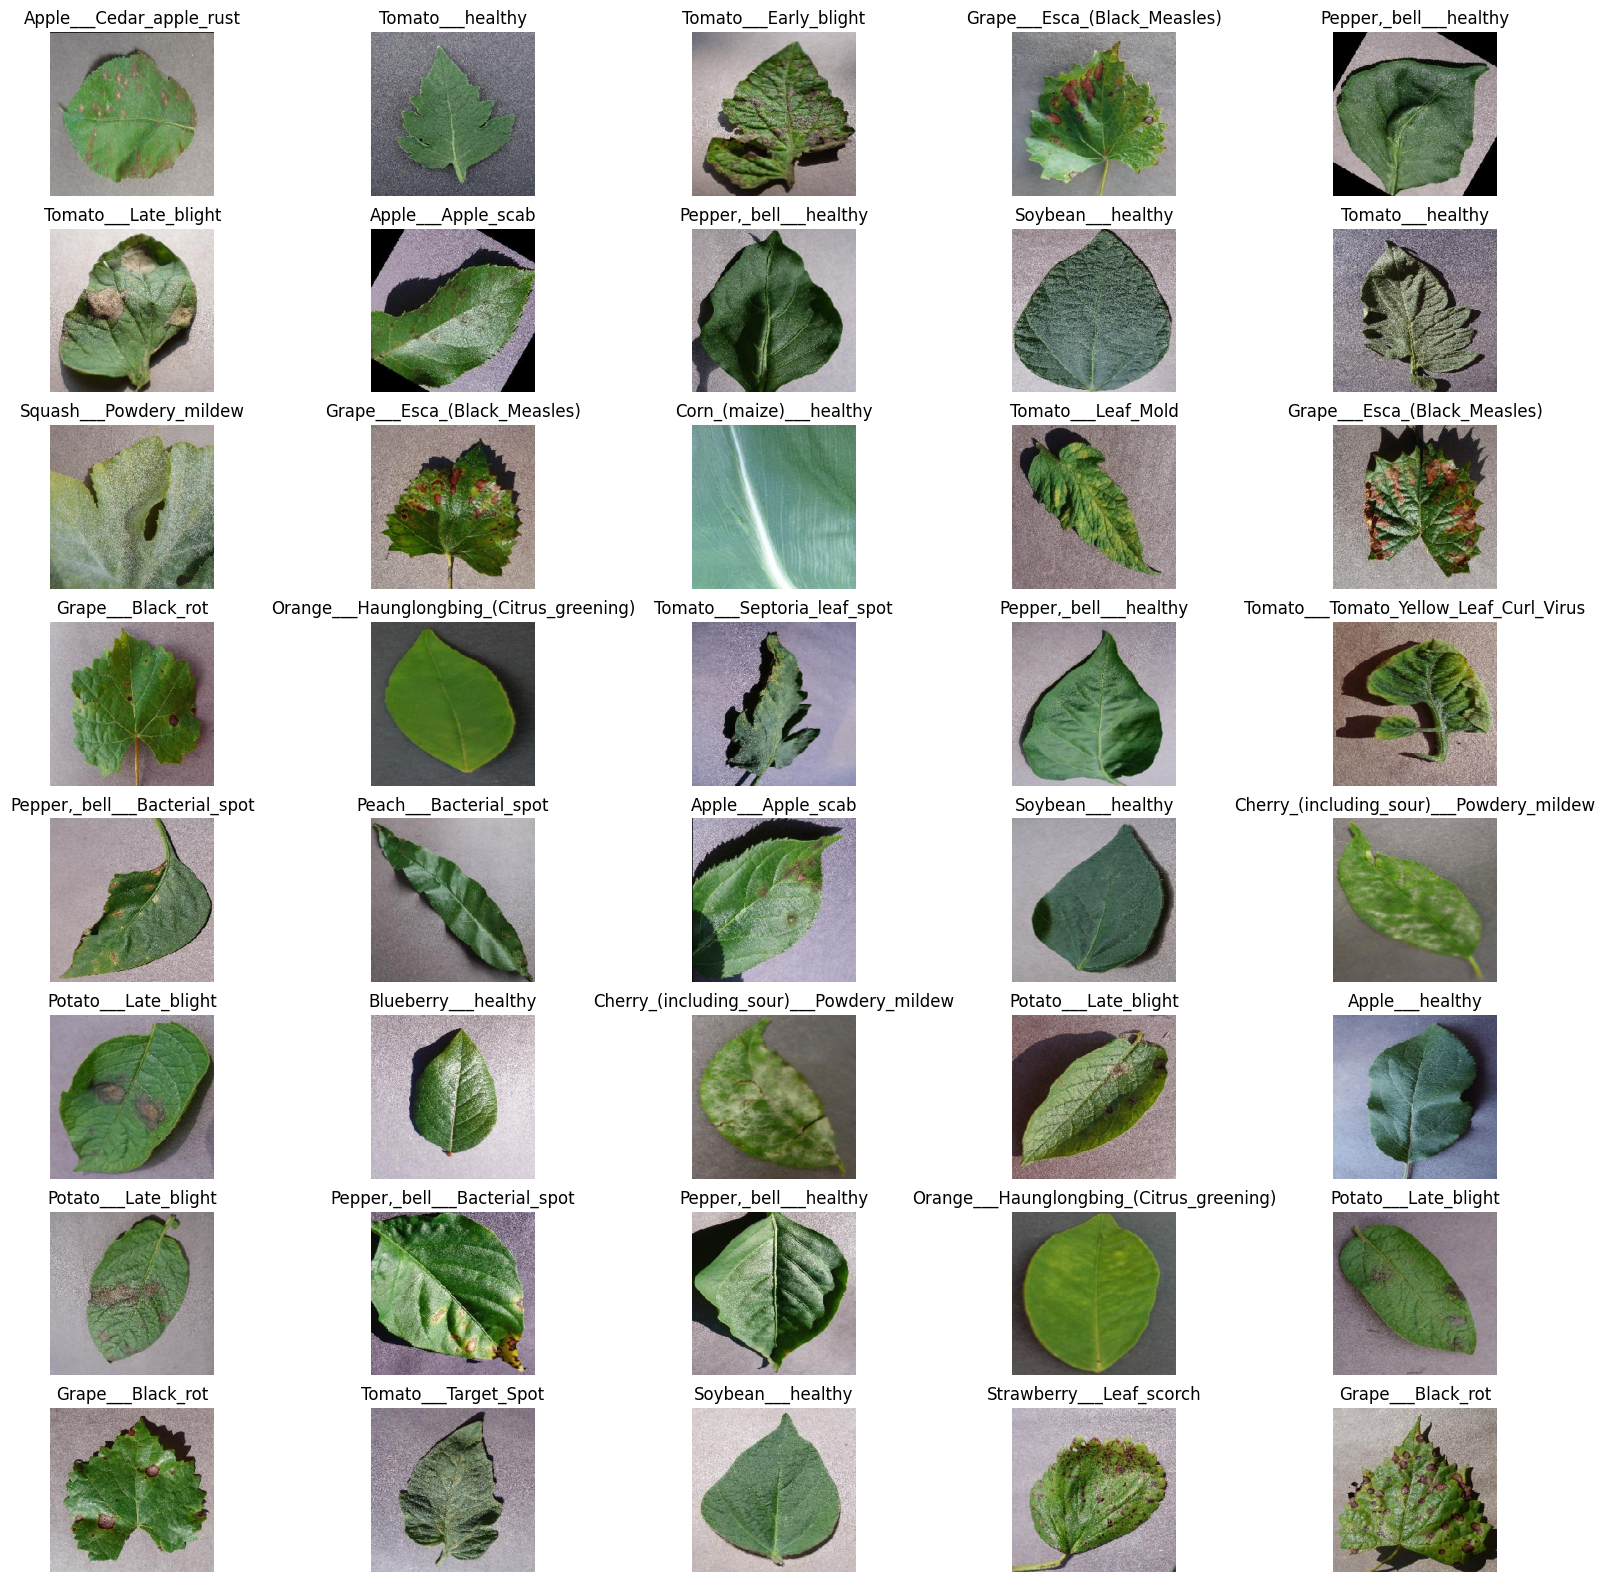

In [10]:
max_images = 40  
plt.figure(figsize=(20,20))
for X_batch, y_batch in train:
    for i in range(min(max_images, len(X_batch))):
        plt.subplot(8, 5, i + 1)  
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])
        plt.axis('off')
    plt.show()
    break

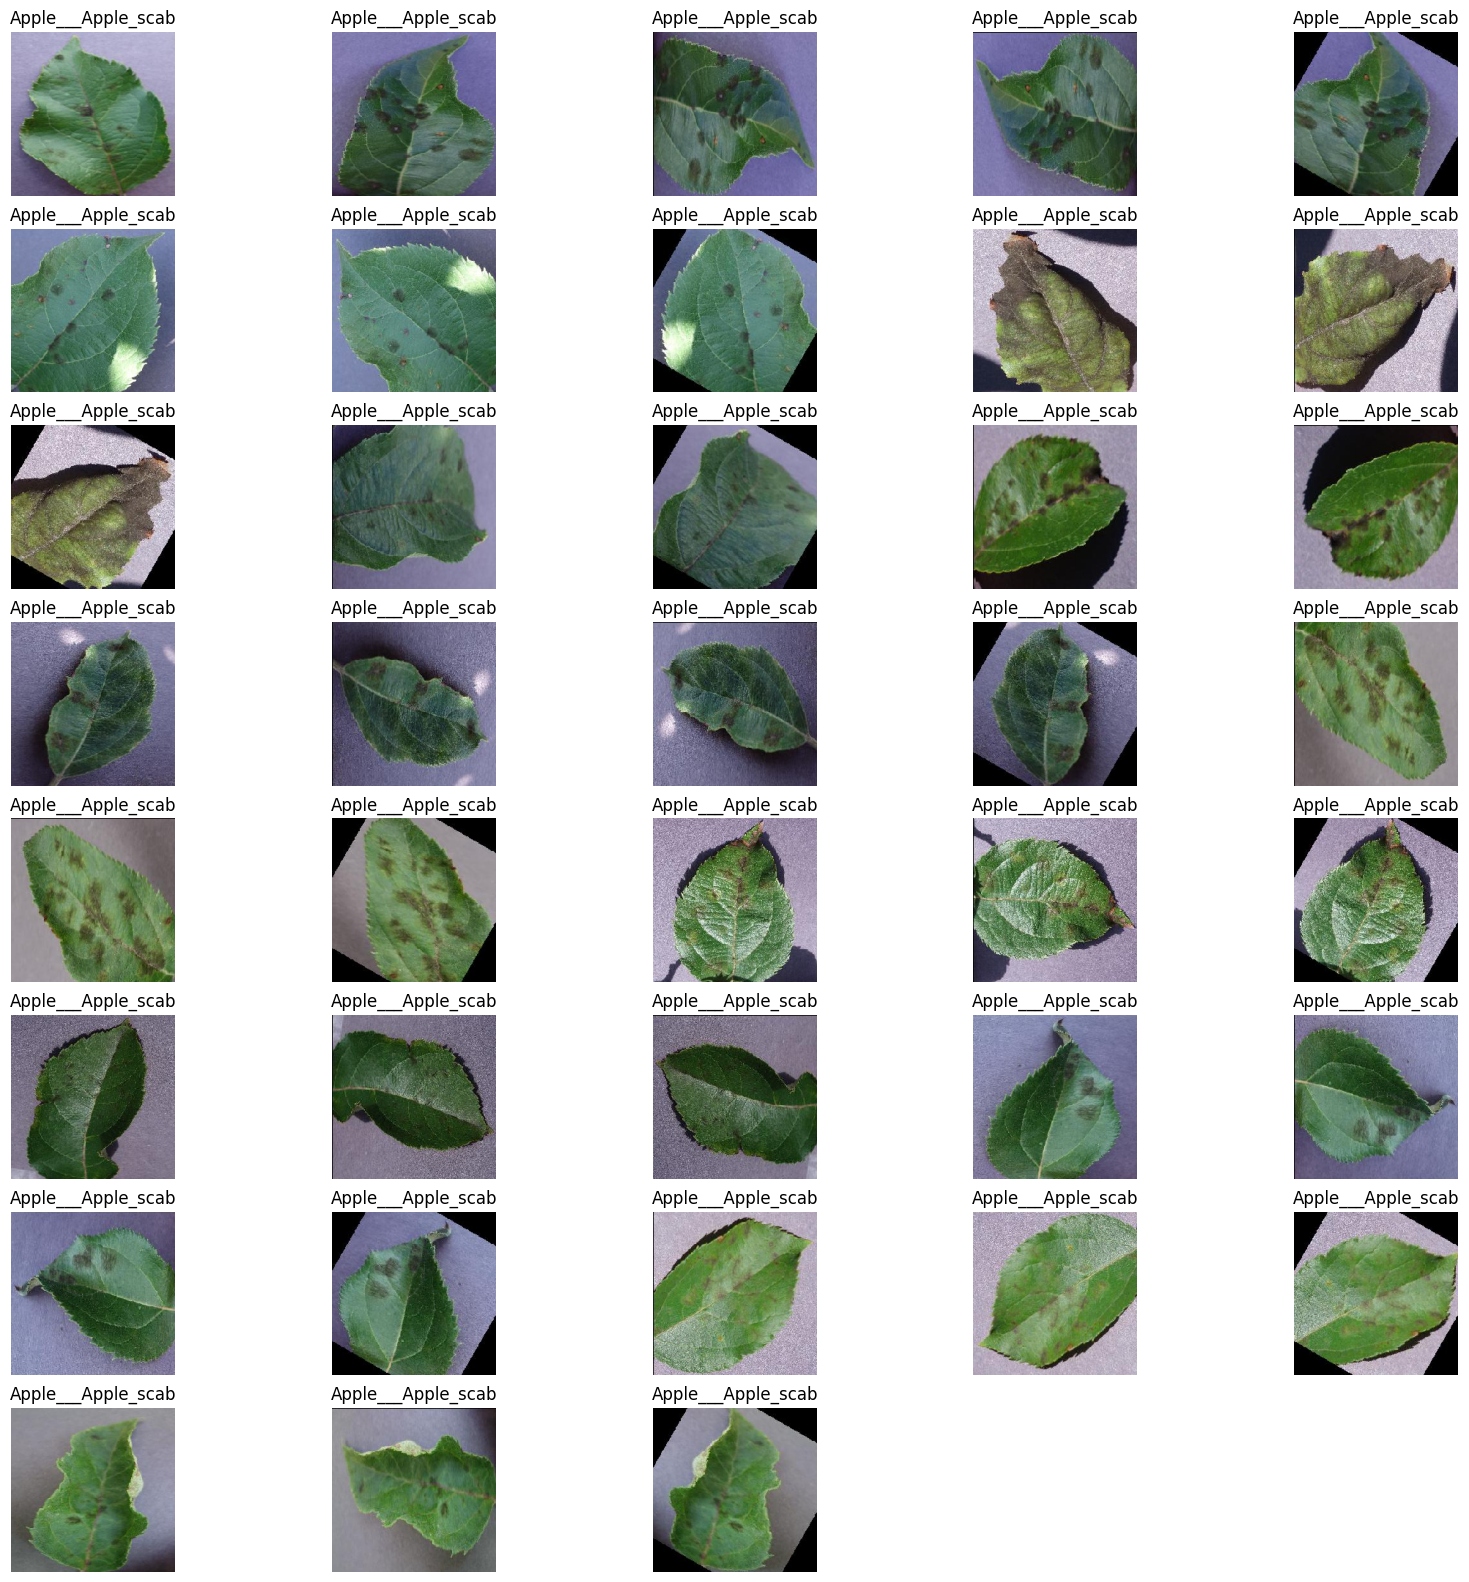

In [11]:
max_images = 38 
plt.figure(figsize=(20,20))
for X_batch, y_batch in validation:
    # Create a grid of images based on the maximum number
    for i in range(min(max_images, len(X_batch))):  #
        plt.subplot(8, 5, i + 1)  # Adjust the grid size as needed
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])  # When y is categorical
        plt.axis('off')  # Turn off grid lines
    plt.show()  # Show the plot
    break  

In [12]:
!rm -rf ~/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5


In [22]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf

# Define the input shape
input_shape = (224, 224, 3)
input_layer = tf.keras.Input(shape=input_shape)

# Load the VGG16 model
vgg16_base_model = VGG16(
    include_top=False,  # Exclude the fully connected layers at the top
    weights='imagenet',  # Use pre-trained weights on ImageNet
    input_tensor=input_layer  # Specify the input tensor
)

# Freeze the VGG16 model's weights
vgg16_base_model.trainable = False

# Print the summary of the VGG16 model
vgg16_base_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
vgg16_model = tf.keras.models.Sequential([
    vgg16_base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(38, activation='softmax')  # Adjust output units
])
vgg16_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
from tensorflow.keras.metrics import Precision, Recall

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the VGG16 model
vgg16_model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy", Precision(name='precision'), Recall(name='recall')]
)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    verbose=1,
    restore_best_weights=True
)

checkpoints = ModelCheckpoint(
    'vgg16.keras',  # Updated file name for VGG16
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

reduceonplateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.000001
)

# Combine callbacks into a list
callback = [early_stopping, reduceonplateau, checkpoints]


In [26]:
vgg16_history = vgg16_model.fit(
    train,
    epochs=40,
    validation_data=validation,
    callbacks=callback,
    batch_size=64
)


Epoch 1/40


2024-12-17 12:17:23.782371: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=2} for conv (f32[128,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-17 12:17:27.102034: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 4.319875934s
Trying algorithm eng12{k11=2} for conv (f32[128,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_

440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.2710 - loss: 3.1226 - precision: 0.4976 - recall: 0.0013
Epoch 1: val_loss improved from inf to 1.89398, saving model to vgg16.keras
440/440 ━━━━━━━━━━━━━━━━━━━━ 446s 886ms/step - accuracy: 0.2714 - loss: 3.1215 - precision: 0.4986 - recall: 0.0013 - val_accuracy: 0.7259 - val_loss: 1.8940 - val_precision: 0.9486 - val_recall: 0.0407 - learning_rate: 0.0010
Epoch 2/40
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.6865 - loss: 1.7473 - precision: 0.9619 - recall: 0.0863
Epoch 2: val_loss improved from 1.89398 to 1.31401, saving model to vgg16.keras
440/440 ━━━━━━━━━━━━━━━━━━━━ 334s 754ms/step - accuracy: 0.6865 - loss: 1.7470 - precision: 0.9620 - recall: 0.0865 - val_accuracy: 0.7718 - val_loss: 1.3140 - val_precision: 0.9790 - val_recall: 0.2356 - learning_rate: 0.0010
Epoch 3/40
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.7435 - loss: 1.2778 - precision: 0.9662 - recall: 0.2732
Epoch 3: val_loss improved

In [28]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

vgg16_model.save('our-model1.h5')